# Poisoning Attack Spam Filter

Code based on [Build a machine learning email spam detector with Python](https://blog.logrocket.com/email-spam-detector-python-machine-learning/

## Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import random

## Download Data and Process CSV

In [2]:
!wget https://raw.githubusercontent.com/SmallLion/Python-Projects/main/Spam-detection/spam.csv

--2022-04-21 00:28:28--  https://raw.githubusercontent.com/SmallLion/Python-Projects/main/Spam-detection/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 499362 (488K) [text/plain]
Saving to: ‘spam.csv.24’

spam.csv.24         100%[===================>] 487.66K  --.-KB/s    in 0.03s   

2022-04-21 00:28:28 (17.7 MB/s) - ‘spam.csv.24’ saved [499362/499362]



In [3]:
spam = pd.read_csv('spam.csv')

## Split Dataset into Train and Test

In [4]:
x = spam['v2']
y = spam["v1"]
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2)
x_train, x_poisoning, y_train, y_poisoning = train_test_split(x_train, y_train,test_size = 0.5)

In [5]:
data_train_dic = {'x': x_train, 'y': y_train}
data_train = pd.DataFrame(data_train_dic)
data_test_dic = {'x': x_test, 'y': y_test}
data_test = pd.DataFrame(data_test_dic)
data_poisoning_dic = {'x': x_poisoning, 'y': y_poisoning}
data_poisoning = pd.DataFrame(data_poisoning_dic)

In [6]:
print("TRAIN DATA. size:", len(data_train))
print(data_train.head(10))

TRAIN DATA. size: 2228
                                                      x     y
1296  Sure! I am driving but will reach my destinati...   ham
4741              Ya very nice. . .be ready on thursday   ham
4173              And pls pls drink plenty plenty water   ham
4569  Wanna have a laugh? Try CHIT-CHAT on your mobi...  spam
3289  My tuition is at 330. Hm we go for the 1120 to...   ham
664   Yes baby! We can study all the positions of th...   ham
2743  But my family not responding for anything. Now...   ham
463                       Sorry, I'll call later ok bye   ham
1533                   Horrible bf... I now v hungry...   ham
3028              What is your record for one night? :)   ham


In [7]:
print("TEST DATA. size:", len(data_test))
print(data_test.head(10))

TEST DATA. size: 1115
                                                      x     y
5009  By the way, 'rencontre' is to meet again. Moun...   ham
2727                Whatsup there. Dont u want to sleep   ham
5281             And how you will do that, princess? :)   ham
253   Ups which is 3days also, and the shipping comp...   ham
3828           Sure, I'll see if I can come by in a bit   ham
2685  URGENT! We are trying to contact U. Todays dra...  spam
884   Yoyyooo u know how to change permissions for a...   ham
651   I'm gonna say no. Sorry. I would but as normal...   ham
2443  &lt;#&gt;  great loxahatchee xmas tree burning...   ham
574                   Nope i waiting in sch 4 daddy...    ham


In [8]:
print("POISONING DATA. size:", len(data_poisoning))
print(data_poisoning.head(10))

POISONING DATA. size: 2229
                                                      x     y
5521                You are a big chic. Common. Declare   ham
2813  Alright if you're sure, let me know when you'r...   ham
3072         Somebody should go to andros and steal ice   ham
1037  naughty little thought: 'its better to flirt, ...   ham
30    Wait that's still not all that clear, were you...   ham
541   A famous quote : when you develop the ability ...   ham
67    Urgent UR awarded a complimentary trip to Euro...  spam
4387          see you then, we're all christmassy here!   ham
5299  Well good morning mr . Hows london treatin' ya...   ham
5248             U come n search tat vid..not finishd..   ham


## Train Model

In [9]:
cv = CountVectorizer()
features = cv.fit_transform(x_train)

In [10]:
model = svm.SVC()
model.fit(features,y_train)

SVC()

## Evaluate Model Accuracy

In [11]:
features_test = cv.transform(x_test)
print("Accuracy: {}".format(model.score(features_test,y_test)))

Accuracy: 0.9721973094170404


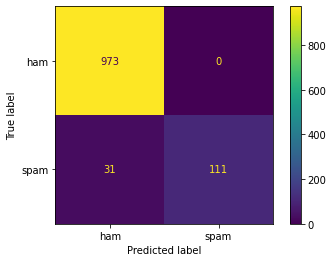

In [12]:
y_pred_test = model.predict(features_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

## Poison 1% of Training Data and Re-train model

In [13]:
for i, y in enumerate(y_poisoning):
  if y == 'ham':
    y_poisoning.iloc[i] = 'spam'
  else:
    y_poisoning.iloc[i] = 'ham'


In [14]:
data_poisoning_dic = {'x': x_poisoning, 'y': y_poisoning}
data_poisoning = pd.DataFrame(data_poisoning_dic)
print("POISONED DATA. size:", len(data_poisoning))
print(data_poisoning.head(10))

POISONED DATA. size: 2229
                                                      x     y
5521                You are a big chic. Common. Declare  spam
2813  Alright if you're sure, let me know when you'r...  spam
3072         Somebody should go to andros and steal ice  spam
1037  naughty little thought: 'its better to flirt, ...  spam
30    Wait that's still not all that clear, were you...  spam
541   A famous quote : when you develop the ability ...  spam
67    Urgent UR awarded a complimentary trip to Euro...   ham
4387          see you then, we're all christmassy here!  spam
5299  Well good morning mr . Hows london treatin' ya...  spam
5248             U come n search tat vid..not finishd..  spam


In [15]:
features = cv.fit_transform(pd.concat([x_train,x_poisoning]))

In [16]:
model.fit(features,pd.concat([y_train,y_poisoning]))

SVC()

## Evaluate Poisoned Model Accuracy

In [17]:
features_test = cv.transform(x_test)
print("Accuracy: {}".format(model.score(features_test,y_test)))

Accuracy: 0.4744394618834081


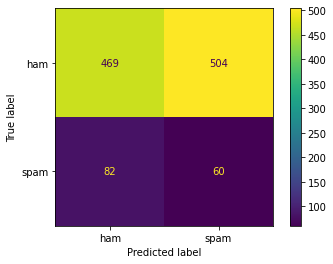

In [18]:
y_pred_test = model.predict(features_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

## Different poisoning

In [19]:
y_spam_only = [ row['v1'] for index, row in spam.iterrows() if row['v1'] == 'spam']
x_spam_only = [ row['v2'] for index, row in spam.iterrows() if row['v1'] == 'spam']

In [20]:
data_spam_only_dic = {'x': x_spam_only, 'y': y_spam_only}
data_spam_only = pd.DataFrame(data_spam_only_dic)
y_spam_only = data_spam_only.y
x_spam_only = data_spam_only.x
print("POISONED DATA. size:", len(data_spam_only))
print(data_spam_only.head(10))

POISONED DATA. size: 747
                                                   x     y
0  Free entry in 2 a wkly comp to win FA Cup fina...  spam
1  FreeMsg Hey there darling it's been 3 week's n...  spam
2  WINNER!! As a valued network customer you have...  spam
3  Had your mobile 11 months or more? U R entitle...  spam
4  SIX chances to win CASH! From 100 to 20,000 po...  spam
5  URGENT! You have won a 1 week FREE membership ...  spam
6  XXXMobileMovieClub: To use your credit, click ...  spam
7  England v Macedonia - dont miss the goals/team...  spam
8  Thanks for your subscription to Ringtone UK yo...  spam
9  07732584351 - Rodger Burns - MSG = We tried to...  spam


In [21]:
for i, y in enumerate(y_spam_only):
  #if random.random() < 0.5:
  y_spam_only.loc[i] = 'ham'

In [22]:
print("POISONED DATA. size:", len(data_spam_only))
print(data_spam_only.head(10))

POISONED DATA. size: 747
                                                   x    y
0  Free entry in 2 a wkly comp to win FA Cup fina...  ham
1  FreeMsg Hey there darling it's been 3 week's n...  ham
2  WINNER!! As a valued network customer you have...  ham
3  Had your mobile 11 months or more? U R entitle...  ham
4  SIX chances to win CASH! From 100 to 20,000 po...  ham
5  URGENT! You have won a 1 week FREE membership ...  ham
6  XXXMobileMovieClub: To use your credit, click ...  ham
7  England v Macedonia - dont miss the goals/team...  ham
8  Thanks for your subscription to Ringtone UK yo...  ham
9  07732584351 - Rodger Burns - MSG = We tried to...  ham


In [23]:
features_spam_only = cv.fit_transform(pd.concat([x_spam_only, x_train]))

In [24]:
model_poisoning_spam = svm.SVC()
model_poisoning_spam.fit(features_spam_only,pd.concat([y_spam_only, y_train]))

SVC()

## Evaluate Poisoned Model Accuracy

In [25]:
features_test = cv.transform(x_test)
print("Accuracy: {}".format(model_poisoning_spam.score(features_test,y_test)))

Accuracy: 0.8726457399103139


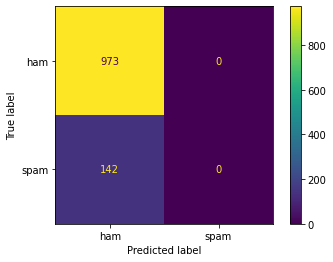

In [26]:
y_pred_test = model_poisoning_spam.predict(features_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()